In [1]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import pandas as pd

import re

## Features 

In [2]:
import re

indexes = []
features = []
with open('../homework2_exercise2/data/features', 'r') as f:
    for line in f.readlines():
        index, *feat = line.split(':')
        feat = ''.join(feat)
        feat = re.findall('"([^\"]*)"', feat)
        indexes.append(index)
    
        
        feat += [f.split('_')[0] for f in feat]
        feat = list(set(feat))
        
        features.append(feat)

In [3]:
one_hot = MultiLabelBinarizer()
mhe = one_hot.fit_transform(features)
df = pd.DataFrame(mhe)

In [4]:
df.rename(columns=lambda x: f'feat_{x}', inplace=True)
df = df.T.drop_duplicates().T
df = df.astype(bool)
df['theorem'] = indexes

In [5]:
del mhe
del features
del indexes

# Dataset

## Ones

In [6]:
indexes_train = []
premises = []

ones = []

with open('../homework2_exercise2/data/dependencies_train', 'r') as f:
    for line in f.readlines():
        index, *prem = line.split(':')
        prem = ''.join(prem).split()
        
        indexes_train.append(index)
        premises.append(prem)
        
        for p in prem:
            ones.append((index, p))

In [7]:
ones_df = pd.DataFrame(ones, columns=['theorem', 'premise']).drop_duplicates()

In [8]:
del ones
del premises
del indexes_train

## Zeros

In [9]:
chronology = pd.read_csv('../homework2_exercise2/data/chronology_backup', squeeze=True, names=['chronology'])
def get_available_theorems(name):
    return chronology.loc[:(chronology == name).argmax()-1]

In [10]:
used_premises = ones_df.groupby('theorem')['premise'].unique()

In [11]:
FALSE_EXAMPLES_RATIO = 2

dataset_zeros = []
for theorem, theorem_premises in ones_df.groupby('theorem')['premise']:
    available_theorems = get_available_theorems(theorem)
    zero_premises = np.setdiff1d(available_theorems, theorem_premises)
    
    zeros_chosen = zero_premises[np.random.randint(0, len(zero_premises), FALSE_EXAMPLES_RATIO * theorem_premises.shape[0])]
    dataset_zeros += list(zip(
        [theorem] * len(zeros_chosen),
        zeros_chosen
    ))

/home/piotrek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
zeros_df = pd.DataFrame(dataset_zeros, columns=['theorem', 'premise'])

In [13]:
del dataset_zeros
del used_premises

### autoencoder

In [14]:
df.shape

(4564, 4872)

In [15]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 64

# this is our input placeholder
input_data = Input(shape=(4871,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_data)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(4871, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
encoder = Model(input_data, encoded)

In [17]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [18]:
autoencoder.fit(df.drop('theorem', axis=1), df.drop('theorem', axis=1),
                epochs=400,
                batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
4564/4564 [==============================] - 2s 431us/step - loss: 0.6921
Epoch 2/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.6899
Epoch 3/400
4564/4564 [==============================] - 1s 116us/step - loss: 0.6872
Epoch 4/400
4564/4564 [==============================] - 1s 125us/step - loss: 0.6828
Epoch 5/400
4564/4564 [==============================] - 1s 115us/step - loss: 0.6736
Epoch 6/400
4564/4564 [==============================] - 1s 113us/step - loss: 0.6516
Epoch 7/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.6004
Epoch 8/400
4564/4564 [==============================] - 1s 118us/step - loss: 0.5043
Epoch 9/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.3801
Epoch 10/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.2727
Epoch 11/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.2000
Epoc

4564/4564 [==============================] - 1s 111us/step - loss: 0.0236
Epoch 93/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0236
Epoch 94/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0235
Epoch 95/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0235
Epoch 96/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0235
Epoch 97/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0234
Epoch 98/400
4564/4564 [==============================] - 1s 113us/step - loss: 0.0234
Epoch 99/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0233
Epoch 100/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0233
Epoch 101/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.0233
Epoch 102/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0232
Epoch 103/400
4564/4564 [============================

4564/4564 [==============================] - 1s 117us/step - loss: 0.0210
Epoch 186/400
4564/4564 [==============================] - 1s 113us/step - loss: 0.0209
Epoch 187/400
4564/4564 [==============================] - 1s 119us/step - loss: 0.0209
Epoch 188/400
4564/4564 [==============================] - 1s 113us/step - loss: 0.0209
Epoch 189/400
4564/4564 [==============================] - 1s 119us/step - loss: 0.0208
Epoch 190/400
4564/4564 [==============================] - 1s 116us/step - loss: 0.0208
Epoch 191/400
4564/4564 [==============================] - 1s 115us/step - loss: 0.0208
Epoch 192/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0208
Epoch 193/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0207
Epoch 194/400
4564/4564 [==============================] - 1s 117us/step - loss: 0.0207
Epoch 195/400
4564/4564 [==============================] - 1s 117us/step - loss: 0.0207
Epoch 196/400
4564/4564 [=====================

4564/4564 [==============================] - 1s 110us/step - loss: 0.0188
Epoch 279/400
4564/4564 [==============================] - 0s 108us/step - loss: 0.0187
Epoch 280/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.0187
Epoch 281/400
4564/4564 [==============================] - 1s 115us/step - loss: 0.0187
Epoch 282/400
4564/4564 [==============================] - 1s 118us/step - loss: 0.0187
Epoch 283/400
4564/4564 [==============================] - 1s 115us/step - loss: 0.0187
Epoch 284/400
4564/4564 [==============================] - 0s 108us/step - loss: 0.0186
Epoch 285/400
4564/4564 [==============================] - 1s 124us/step - loss: 0.0186
Epoch 286/400
4564/4564 [==============================] - 1s 114us/step - loss: 0.0186
Epoch 287/400
4564/4564 [==============================] - 1s 129us/step - loss: 0.0186
Epoch 288/400
4564/4564 [==============================] - 1s 115us/step - loss: 0.0186
Epoch 289/400
4564/4564 [=====================

4564/4564 [==============================] - 1s 111us/step - loss: 0.0172
Epoch 372/400
4564/4564 [==============================] - 1s 115us/step - loss: 0.0172
Epoch 373/400
4564/4564 [==============================] - 0s 109us/step - loss: 0.0172
Epoch 374/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.0172
Epoch 375/400
4564/4564 [==============================] - 1s 112us/step - loss: 0.0171
Epoch 376/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0171
Epoch 377/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0171
Epoch 378/400
4564/4564 [==============================] - 1s 110us/step - loss: 0.0171
Epoch 379/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0171
Epoch 380/400
4564/4564 [==============================] - 1s 111us/step - loss: 0.0171
Epoch 381/400
4564/4564 [==============================] - 1s 117us/step - loss: 0.0171
Epoch 382/400
4564/4564 [=====================

In [19]:
df_autoenc = pd.DataFrame(encoder.predict(df.drop('theorem', axis=1)))

In [20]:
df_autoenc['theorem'] = df['theorem']

In [21]:
df_autoenc.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,theorem
0,0.174485,5.802565,6.572248,1.046988,3.771890,1.628584,3.254599,0.632132,1.195083,0.000000,...,0.316736,0.000000,4.056600,0.000000,3.393760,2.833054,1.295640,1.076325,0.551563,abstractness_v1_orders_2
1,0.294873,5.713292,6.668814,1.089301,3.972167,1.774259,2.961862,0.285862,0.906719,0.000000,...,0.375667,0.000000,4.005151,0.054627,3.275133,3.227659,1.427314,0.848495,0.510101,abstractness_v1_pre_topc
2,0.131523,4.889763,5.338396,1.082238,3.030603,1.452361,2.509691,0.406721,0.823919,0.151467,...,0.156697,0.003650,2.910199,0.000000,2.635356,2.395504,1.230138,0.914943,0.586513,abstractness_v3_lattices
3,0.080363,5.033637,5.618406,1.035449,3.385143,1.445679,2.727648,0.422816,0.960209,0.000000,...,0.217018,0.031132,3.358080,0.072804,2.842786,2.562266,1.053204,0.815004,0.459143,abstractness_v6_waybel_0
4,0.000110,4.631509,4.395852,1.430120,2.238285,1.521761,2.045663,0.236124,0.994178,0.000000,...,0.131784,0.000000,2.043671,0.009435,1.827108,2.604370,1.144447,1.004012,0.368320,antisymmetry_r2_hidden


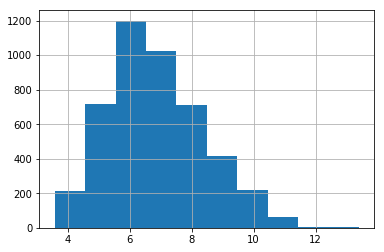

In [23]:
df_autoenc[1].hist()

##  Merging

In [24]:
zeros_df['useful'] = 0
ones_df['useful'] = 1
df_merged = pd.concat([zeros_df, ones_df])

In [25]:
del zeros_df
del ones_df

In [26]:
df_feats = pd.concat([df, df_autoenc.drop('theorem', axis=1)], axis=1)

In [27]:
def map_features(thm_prem_pairs):
    df_values = pd.merge(
        thm_prem_pairs, df_feats,
        left_on=['theorem'],
        right_on=['theorem']
    )
    df_values = pd.merge(
        df_values, df_feats,
        left_on=['premise'],
        right_on=['theorem'],
        suffixes=('_prem', '_thm')
    ).drop(['theorem_thm'], axis=1).rename(columns={'theorem_prem': 'theorem'})
    return df_values

In [28]:
df_train = map_features(df_merged)
df_train.head()

,theorem,premise,useful,feat_0_prem,feat_1_prem,feat_2_prem,feat_3_prem,feat_4_prem,feat_6_prem,feat_7_prem,...,54_thm,55_thm,56_thm,57_thm,58_thm,59_thm,60_thm,61_thm,62_thm,63_thm
0,t100_tmap_1,t41_setfam_1,0,False,False,False,False,False,False,False,...,4.13151,0.151155,0.0,2.773063,0.203781,2.383676,3.155999,1.466626,1.141072,0.613283
1,t10_tops_2,t41_setfam_1,0,False,False,False,False,True,False,False,...,4.13151,0.151155,0.0,2.773063,0.203781,2.383676,3.155999,1.466626,1.141072,0.613283
2,t151_relat_1,t41_setfam_1,0,False,False,False,False,True,False,False,...,4.13151,0.151155,0.0,2.773063,0.203781,2.383676,3.155999,1.466626,1.141072,0.613283
3,t157_funct_1,t41_setfam_1,0,False,False,False,False,False,False,False,...,4.13151,0.151155,0.0,2.773063,0.203781,2.383676,3.155999,1.466626,1.141072,0.613283
4,t158_relat_1,t41_setfam_1,0,False,False,False,False,False,False,False,...,4.13151,0.151155,0.0,2.773063,0.203781,2.383676,3.155999,1.466626,1.141072,0.613283


# Training 

In [29]:
import lightgbm as lgb

In [32]:
# train test split
from sklearn.model_selection import train_test_split
train_theorems, test_theorems = train_test_split(df_train['theorem'].unique(), shuffle=True, train_size=0.60)

train = df_train['theorem'].isin(train_theorems)
test = df_train['theorem'].isin(test_theorems)

features = list(df_train.columns.drop(['theorem', 'premise', 'useful']))
y_name = 'useful'

### lgbm

In [33]:
train_data = lgb.Dataset(df_train[train][features], df_train[train][y_name],
                        #categorical_feature=features,
                        free_raw_data=False
                        )
test_data = lgb.Dataset(df_train[test][features], df_train[test][y_name],
                        #categorical_feature=features,
                        free_raw_data=False
                        )

In [35]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 60,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'lambda_l2': 0.03,
    'verbose': 1,
    'threads': 6,
    'num_boost_round': 4000,
    'early_stopping_rounds': 300
}
model = lgb.train(
    parameters,
    train_data,
    valid_sets=test_data
)

[1]	valid_0's auc: 0.7769
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's auc: 0.809559
[3]	valid_0's auc: 0.820143
[4]	valid_0's auc: 0.828673
[5]	valid_0's auc: 0.830683
[6]	valid_0's auc: 0.832899
[7]	valid_0's auc: 0.836872
[8]	valid_0's auc: 0.837211
[9]	valid_0's auc: 0.838731
[10]	valid_0's auc: 0.839048
[11]	valid_0's auc: 0.841607
[12]	valid_0's auc: 0.843637
[13]	valid_0's auc: 0.845925
[14]	valid_0's auc: 0.847074
[15]	valid_0's auc: 0.84851
[16]	valid_0's auc: 0.850508
[17]	valid_0's auc: 0.851906
[18]	valid_0's auc: 0.853028
[19]	valid_0's auc: 0.854337
[20]	valid_0's auc: 0.855194
[21]	valid_0's auc: 0.856941
[22]	valid_0's auc: 0.857968
[23]	valid_0's auc: 0.859227
[24]	valid_0's auc: 0.860754
[25]	valid_0's auc: 0.862065
[26]	valid_0's auc: 0.863339
[27]	valid_0's auc: 0.864801
[28]	valid_0's auc: 0.865889
[29]	valid_0's auc: 0.866713
[30]	valid_0's auc: 0.867721
[31]	valid_0's auc: 0.868739
[32]	valid_0's auc: 0.869457
[33]	valid_0's auc: 0

[282]	valid_0's auc: 0.917646
[283]	valid_0's auc: 0.917705
[284]	valid_0's auc: 0.917754
[285]	valid_0's auc: 0.917832
[286]	valid_0's auc: 0.917827
[287]	valid_0's auc: 0.917914
[288]	valid_0's auc: 0.917955
[289]	valid_0's auc: 0.917988
[290]	valid_0's auc: 0.917975
[291]	valid_0's auc: 0.918015
[292]	valid_0's auc: 0.918049
[293]	valid_0's auc: 0.918085
[294]	valid_0's auc: 0.918151
[295]	valid_0's auc: 0.91814
[296]	valid_0's auc: 0.918186
[297]	valid_0's auc: 0.918244
[298]	valid_0's auc: 0.918282
[299]	valid_0's auc: 0.918305
[300]	valid_0's auc: 0.91829
[301]	valid_0's auc: 0.91832
[302]	valid_0's auc: 0.918357
[303]	valid_0's auc: 0.918437
[304]	valid_0's auc: 0.918476
[305]	valid_0's auc: 0.918477
[306]	valid_0's auc: 0.918516
[307]	valid_0's auc: 0.918543
[308]	valid_0's auc: 0.918542
[309]	valid_0's auc: 0.91855
[310]	valid_0's auc: 0.918608
[311]	valid_0's auc: 0.918637
[312]	valid_0's auc: 0.918665
[313]	valid_0's auc: 0.918701
[314]	valid_0's auc: 0.918817
[315]	valid_0'

[562]	valid_0's auc: 0.92323
[563]	valid_0's auc: 0.923245
[564]	valid_0's auc: 0.923282
[565]	valid_0's auc: 0.923272
[566]	valid_0's auc: 0.923287
[567]	valid_0's auc: 0.923305
[568]	valid_0's auc: 0.923325
[569]	valid_0's auc: 0.923346
[570]	valid_0's auc: 0.923345
[571]	valid_0's auc: 0.923352
[572]	valid_0's auc: 0.923352
[573]	valid_0's auc: 0.923354
[574]	valid_0's auc: 0.923382
[575]	valid_0's auc: 0.923376
[576]	valid_0's auc: 0.923387
[577]	valid_0's auc: 0.923405
[578]	valid_0's auc: 0.923436
[579]	valid_0's auc: 0.923425
[580]	valid_0's auc: 0.923433
[581]	valid_0's auc: 0.923471
[582]	valid_0's auc: 0.923507
[583]	valid_0's auc: 0.923541
[584]	valid_0's auc: 0.923569
[585]	valid_0's auc: 0.923571
[586]	valid_0's auc: 0.923598
[587]	valid_0's auc: 0.923616
[588]	valid_0's auc: 0.923637
[589]	valid_0's auc: 0.923655
[590]	valid_0's auc: 0.923658
[591]	valid_0's auc: 0.923665
[592]	valid_0's auc: 0.923682
[593]	valid_0's auc: 0.923697
[594]	valid_0's auc: 0.923701
[595]	valid

[844]	valid_0's auc: 0.924247
[845]	valid_0's auc: 0.924231
[846]	valid_0's auc: 0.924241
[847]	valid_0's auc: 0.924236
[848]	valid_0's auc: 0.924234
[849]	valid_0's auc: 0.924209
[850]	valid_0's auc: 0.924198
[851]	valid_0's auc: 0.924161
[852]	valid_0's auc: 0.924156
[853]	valid_0's auc: 0.924132
[854]	valid_0's auc: 0.924127
[855]	valid_0's auc: 0.924108
[856]	valid_0's auc: 0.924107
[857]	valid_0's auc: 0.924086
[858]	valid_0's auc: 0.9241
[859]	valid_0's auc: 0.924125
[860]	valid_0's auc: 0.92412
[861]	valid_0's auc: 0.924118
[862]	valid_0's auc: 0.924133
[863]	valid_0's auc: 0.924131
[864]	valid_0's auc: 0.92413
[865]	valid_0's auc: 0.924127
[866]	valid_0's auc: 0.924139
[867]	valid_0's auc: 0.924171
[868]	valid_0's auc: 0.924189
[869]	valid_0's auc: 0.924184
[870]	valid_0's auc: 0.924195
[871]	valid_0's auc: 0.924216
[872]	valid_0's auc: 0.924207
[873]	valid_0's auc: 0.924208
[874]	valid_0's auc: 0.924231
[875]	valid_0's auc: 0.924237
[876]	valid_0's auc: 0.924241
[877]	valid_0'

### rf

In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=80, n_jobs=-1)
model.fit(df_train[train][features], df_train[train][y_name])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df_train[test][y_name], model.predict_proba(df_train[test][features])[:, 1])

0.9365508414282976

## Production model

In [52]:
train_data = lgb.Dataset(df_train[features], df_train[y_name],
                        #categorical_feature=features,
                        free_raw_data=False
                        )

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
#   'num_leaves': 60,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'lambda_l2': 0.06,
    'verbose': 1,
    'threads': 6,
    'num_boost_round': 2550
}
model = lgb.train(
    parameters,
    train_data
)

In [55]:
train_data = lgb.Dataset(df_train[features], df_train[y_name],
                        #categorical_feature=features,
                        free_raw_data=False
                        )

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
   'num_leaves': 60,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'lambda_l2': 0.06,
    'verbose': 1,
    'threads': 6,
    'num_boost_round': 2200
}
model_small = lgb.train(
    parameters,
    train_data
)

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model.fit(df_train[features], df_train[y_name])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Suggested premises for new conjectures

In [36]:
conjs = pd.read_csv('../homework2_exercise2/data/conjectures_test', squeeze=True, names=['conjecture'])

In [37]:
#usefulness_threshold = 0.8
def get_premises(conj):
    premises = get_available_theorems(conj)
    premises.name = 'premise'
    premises = premises.to_frame()
    premises['theorem'] = conj
    df_values = map_features(premises)
    
    df_X = df_values.drop(['theorem', 'premise'], axis=1)
    
    #premises['useful'] = (model.predict(df_X) + model_small.predict(df_X)) / 2
    premises['useful'] = model.predict(df_X)
    premises = premises.sort_values(by='useful', ascending=False)
    return premises['premise'].head(60)
    #return premises[premises['useful'] > usefulness_threshold]['premise']

In [38]:
import sys
sys.path.append('..')
from homework2_exercise2.run_E_prover import find_proof

In [39]:
statements_path = '../homework2_exercise2/data/statements'
dirpath = '../homework2_exercise2/new_conjectures/'
with open(statements_path, 'r') as f:
    statements_lines = f.read().splitlines()
statements = {}
for l in statements_lines:
    statements[l.split(',')[0].replace('fof(', '')] = l


In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
conj_results = []
proved_cnt = 0
for i, conj_name in enumerate(conjs):
    premises_for_conj = get_premises(conj_name)
    proved = find_proof(conj_name, premises_for_conj, statements, dirpath)
    if i % 10 == 0:
        print('=' * 20)
        print(f'i={i}, proved {proved_cnt}')
    
    if proved:
        proved_cnt += 1
    conj_results.append((conj_name, proved))

Proof of conjecture t34_waybel_0 FOUND. Output in file ../homework2_exercise2/new_conjectures/t34_waybel_0.E_output
i=0, proved 0
Proof of conjecture t5_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t5_funct_2.E_output 
Proof of conjecture t57_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t57_tmap_1.E_output 
Proof of conjecture t52_pre_topc NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t52_pre_topc.E_output 
Proof of conjecture t72_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t72_funct_1.E_output 
Proof of conjecture t84_enumset1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t84_enumset1.E_output
Proof of conjecture t172_funct_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t172_funct_1.E_output
Proof of conjecture t12_funct_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t12_funct_1.E_output
Proof of conjecture t22_zf

Proof of conjecture t25_relset_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t25_relset_1.E_output
Proof of conjecture t75_zfmisc_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t75_zfmisc_1.E_output
Proof of conjecture t137_enumset1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t137_enumset1.E_output 
Proof of conjecture t90_xboole_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t90_xboole_1.E_output
Proof of conjecture t140_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t140_relat_1.E_output 
Proof of conjecture t54_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t54_funct_1.E_output 
i=70, proved 25
Proof of conjecture t18_lattices FOUND. Output in file ../homework2_exercise2/new_conjectures/t18_lattices.E_output
Proof of conjecture t17_waybel_7 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t17_waybel_7.E_output 
Proof of con

Proof of conjecture t108_xboole_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t108_xboole_1.E_output
Proof of conjecture t38_tops_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t38_tops_2.E_output 
Proof of conjecture t50_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t50_tops_1.E_output 
Proof of conjecture t63_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t63_funct_1.E_output 
Proof of conjecture t8_lattice3 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_lattice3.E_output 
Proof of conjecture t40_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t40_tmap_1.E_output 
Proof of conjecture t38_yellow_0 FOUND. Output in file ../homework2_exercise2/new_conjectures/t38_yellow_0.E_output
Proof of conjecture t17_setfam_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t17_setfam_1.E_output 
Proof of conjecture 

Proof of conjecture t111_xboole_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t111_xboole_1.E_output 
Proof of conjecture t63_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t63_waybel_0.E_output 
Proof of conjecture t61_tex_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t61_tex_2.E_output 
Proof of conjecture t18_wellord1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t18_wellord1.E_output
Proof of conjecture t95_enumset1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t95_enumset1.E_output
i=200, proved 63
Proof of conjecture t17_yellow_6 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t17_yellow_6.E_output 
Proof of conjecture t45_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t45_ordinal1.E_output 
Proof of conjecture t26_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t26_relat_1.E_out

Proof of conjecture t8_waybel_9 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t8_waybel_9.E_output 
Proof of conjecture t94_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t94_zfmisc_1.E_output 
Proof of conjecture t23_relset_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t23_relset_1.E_output
Proof of conjecture t7_yellow19 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t7_yellow19.E_output 
Proof of conjecture t141_zfmisc_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t141_zfmisc_1.E_output
Proof of conjecture t53_setfam_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t53_setfam_1.E_output
Proof of conjecture t193_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t193_funct_2.E_output 
Proof of conjecture t29_tops_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t29_tops_1.E_output 
Proof of conjecture t67

Proof of conjecture t135_zfmisc_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t135_zfmisc_1.E_output 
Proof of conjecture t27_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t27_funct_1.E_output 
Proof of conjecture t49_waybel_7 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t49_waybel_7.E_output 
Proof of conjecture t144_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t144_tmap_1.E_output 
Proof of conjecture t14_yellow_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t14_yellow_1.E_output 
i=330, proved 107
Proof of conjecture t19_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t19_funct_2.E_output 
Proof of conjecture t128_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t128_tmap_1.E_output 
Proof of conjecture t22_relat_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t22_re

Proof of conjecture t107_enumset1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t107_enumset1.E_output
Proof of conjecture t105_enumset1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t105_enumset1.E_output
Proof of conjecture t84_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t84_funct_1.E_output 
Proof of conjecture t77_funct_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t77_funct_2.E_output 
Proof of conjecture t39_relat_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t39_relat_1.E_output 
Proof of conjecture t92_xboole_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t92_xboole_1.E_output
Proof of conjecture t23_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t23_funct_1.E_output 
Proof of conjecture t173_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t173_funct_1.E_output 
Proof of conjecture t

Proof of conjecture t3_yellow_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t3_yellow_1.E_output 
Proof of conjecture t76_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t76_waybel_0.E_output 
Proof of conjecture t116_xboole_1 FOUND. Output in file ../homework2_exercise2/new_conjectures/t116_xboole_1.E_output
Proof of conjecture t20_tmap_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t20_tmap_1.E_output 
Proof of conjecture t65_waybel_0 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t65_waybel_0.E_output 
i=460, proved 141
Proof of conjecture t67_orders_2 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t67_orders_2.E_output 
Proof of conjecture t33_ordinal1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t33_ordinal1.E_output 
Proof of conjecture t51_funct_1 NOT found. Output saved in file ../homework2_exercise2/new_conjectures/t51_f

In [42]:
pd.DataFrame(conj_results)[1].mean()

0.308

In [43]:
pd.DataFrame(conj_results).to_csv('results_embed_raw.csv')

In [22]:
conj_name

NameError: name 'conj_name' is not defined

In [78]:
premises_for_conj.shape

(4,)

In [55]:
conj_name in premises_for_conj

False

In [59]:
chronology[(chronology == 't5_funct_2')]

1478    t5_funct_2
Name: chronology, dtype: object

In [57]:
(premises_for_conj == 't5_funct_2').sum()

1

In [53]:
conj_name

't5_funct_2'

In [48]:
a.shape

(195, 3)

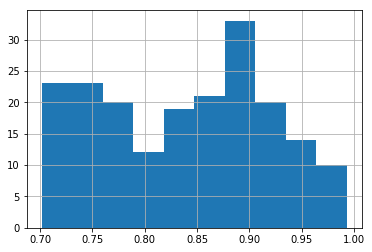

In [49]:
a['useful'].hist()

In [45]:
a['useful'].quantile(0.95)


0.6479658909399986

In [32]:
available_premises_for_conj(conjs[0]).to_frame()

/home/piotrek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


,premises
0,dt_k5_xboole_0
1,dt_k4_xboole_0
2,idempotence_k2_xboole_0
3,d3_xboole_0
4,commutativity_k5_xboole_0
5,d5_xboole_0
6,d6_xboole_0
7,antisymmetry_r2_hidden
8,commutativity_k2_xboole_0
9,dt_k2_xboole_0


In [57]:
available_premises_for_conj('t57_tmap_1').tail()

/home/piotrek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


4561          fc6_yellow19
4562    dt_o_2_13_yellow19
4563          t38_yellow19
4564          t34_waybel_0
4565            t5_funct_2
dtype: object

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

In [11]:
df = pd.DataFrame([[1,2], [1,3],[3,5], [2,4]])
df.head()

,0,1
0,1,2
1,1,3
2,3,5
3,2,4


In [26]:
split = train_test_split(df[0].unique(), shuffle=True)

In [27]:
df[df[0].isin(split[0])]

,0,1
2,3,5
3,2,4


In [28]:
df

,0,1
0,1,2
1,1,3
2,3,5
3,2,4


In [77]:
df_train.shape

(82299, 9745)